In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn.neighbors as knn
from sklearn import svm

### Intentamos clasificar tres circulos

In [82]:
x_1 = [
    np.random.uniform(-4,3)
    for iter in range(0,10000)
]

x_2 = [
    np.random.uniform(-4,3)
    for iter in range(0,10000)
]


x_3 = [(x_1[i])**2 for i in range(len(x_1))]
x_4 = [(x_2[i]-1)**2 for i in range(len(x_1))]

x_5 = [(x_1[i])**2 for i in range(len(x_1))]
x_6 = [(x_2[i]+1)**2 for i in range(len(x_1))]

x_7 = [(x_1[i])**2 for i in range(len(x_1))]
x_8 = [(x_2[i]+3)**2 for i in range(len(x_1))]


y = [(x_3[i] + x_4[i]) <= 0.8 or (x_5[i] + x_6[i]) <= 0.8 or (x_7[i] + x_8[i]) <= 0.8 for i in range(len(x_1))]

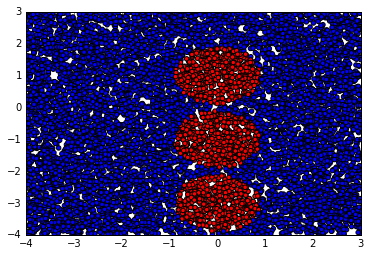

In [88]:
plt.scatter(x_1, x_2, c=['red' if i else 'blue' for i in y])
plt.ylim([-4,3])
plt.xlim([-4,3])

plt.show()

In [85]:
# Training - Test split
X_train=np.asarray([[x_1[i], x_2[i]] for i in range(int(len(x_1)*0.75))]) 
Y_train=np.asarray([[y[i]] for i in range(int(len(y)*0.75))])

X_test=np.asarray([[x_1[i], x_2[i]] for i in range(int(len(x_1)*0.75),len(x_1))]) 
Y_test=np.asarray([[y[i]] for i in range(int(len(y)*0.75),len(y))])

KNN model accuracy: 
0.9908


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


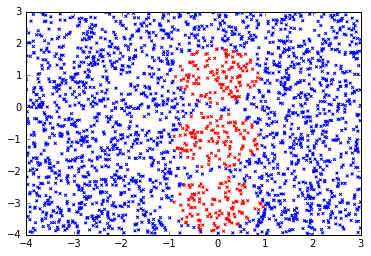

In [87]:
print("KNN model accuracy: ")
knnM=knn.KNeighborsClassifier(n_neighbors=5)
knnM.fit(X_train, Y_train)
Y_knn = knnM.predict(X_test)
print(knnM.score(X_test,Y_test))

plt.scatter(X_test[:,0],X_test[:,1],marker ="x",\
            c=['red' if i==1 else 'blue' for i in Y_knn],s=8)
plt.ylim([-4,3])
plt.xlim([-4,3])
plt.show()
plt.clf()

### Comparamos contra un SVM

SVM model accuracy: 


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9812


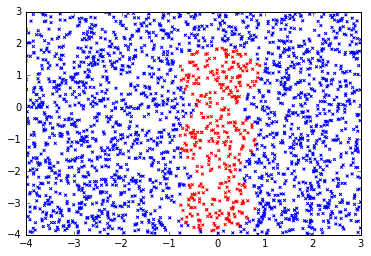

In [90]:
print("SVM model accuracy: ")
sv3=svm.SVC(kernel='rbf')
sv3.fit(X_train, Y_train)
Y_svm3 = sv3.predict(X_test)
print(sv3.score(X_test,Y_test)) 

plt.scatter(X_test[:,0],X_test[:,1],marker ="x",\
            c=['red' if i==1 else 'blue' for i in Y_svm3],\
            s=8)
plt.ylim([-4,3])
plt.xlim([-4,3])
plt.show()
plt.clf()

Notamos que la clasificación en este caso es peor, pues parece como una sola figura en lugar de tres circulos aunque pareció entrenar mas rápido